In [0]:
#@title Importation library
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn import datasets
import random
import matplotlib.pyplot as plt

In [0]:
#@title Telechargement de SOMPY
!git clone https://github.com/sevamoo/SOMPY/

Cloning into 'SOMPY'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 909 (delta 0), reused 0 (delta 0), pack-reused 906
Receiving objects: 100% (909/909), 10.12 MiB | 5.52 MiB/s, done.
Resolving deltas: 100% (492/492), done.


In [0]:
#@title Importation library Sompy
import sompy.sompy as sp
from sompy.visualization import *
import sompy.normalization as norm
from sklearn import preprocessing

In [0]:
#@title Chargement des Donnés Iris
iris = datasets.load_iris()
irisdata =iris.data
iristarget = iris.target
target_name = iris.target_names
mapsize = [30, 30]

In [0]:
#@title Apprentissage par default
sm = sp.SOMFactory.build(irisdata, 
                         mapsize, 
                         mask=None, 
                         mapshape='planar', 
                         lattice='rect', 
                         normalization='var', 
                         initialization='pca', 
                         neighborhood='gaussian', 
                         training='batch', 
                         name='sompy')
sm.train(n_job=1, verbose='info')

 Training...
 pca_linear_initialization took: 0.015000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 180

 epoch: 1 ---> elapsed time:  0.137000, quantization error: 0.469287

 epoch: 2 ---> elapsed time:  0.133000, quantization error: 0.408181

 epoch: 3 ---> elapsed time:  0.134000, quantization error: 0.364103

 epoch: 4 ---> elapsed time:  0.133000, quantization error: 0.351156

 epoch: 5 ---> elapsed time:  0.134000, quantization error: 0.347154

 epoch: 6 ---> elapsed time:  0.134000, quantization error: 0.343055

 epoch: 7 ---> elapsed time:  0.136000, quantization error: 0.341268

 epoch: 8 ---> elapsed time:  0.132000, quantization error: 0.338555

 epoch: 9 ---> elapsed time:  0.136000, quantization error: 0.338193

 epoch: 10 ---> elapsed time:  0.132000, quantization error: 0.336351

 epoch: 11 ---> elapsed time:  0.134000, quantization error: 0.335098

 epoch: 12 ---> elapsed time:  0.141000, quantization error: 0.334082

 epoch: 13 -

In [0]:
#@title Iris Non Normaliser
print('Topo errors: ',sm.calculate_topographic_error())
print('Quanti errors: ',sm.calculate_quantization_error())
print('Map errors:',sm.calculate_map_size(1))

Topo errors:  0.0
Quanti errors:  0.021588849660151177
Map errors: [4, 16]


In [0]:
#@title Normalisation + Train
normalized_iris = preprocessing.normalize(irisdata)
som = sp.SOMFactory.build(normalized_iris,
                          mapsize, 
                          mask=None,
                          mapshape='planar',
                          lattice='rect',
                          normalization='var',
                          initialization='pca',
                          neighborhood='gaussian',
                          training='batch',
                          name='sompy')
som.train()

 Training...
 pca_linear_initialization took: 0.017000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 180

 epoch: 1 ---> elapsed time:  0.133000, quantization error: 0.353632

 epoch: 2 ---> elapsed time:  0.133000, quantization error: 0.248149

 epoch: 3 ---> elapsed time:  0.134000, quantization error: 0.204631

 epoch: 4 ---> elapsed time:  0.133000, quantization error: 0.198988

 epoch: 5 ---> elapsed time:  0.137000, quantization error: 0.195492

 epoch: 6 ---> elapsed time:  0.132000, quantization error: 0.193600

 epoch: 7 ---> elapsed time:  0.134000, quantization error: 0.192010

 epoch: 8 ---> elapsed time:  0.133000, quantization error: 0.190793

 epoch: 9 ---> elapsed time:  0.134000, quantization error: 0.190126

 epoch: 10 ---> elapsed time:  0.133000, quantization error: 0.189183

 epoch: 11 ---> elapsed time:  0.136000, quantization error: 0.188473

 epoch: 12 ---> elapsed time:  0.133000, quantization error: 0.187675

 epoch: 13 -

In [0]:
#@title Iris Normalisée
print('Topo errors: ',som.calculate_topographic_error())
print('Quanti errors: ',som.calculate_quantization_error())
print('Map errors:',som.calculate_map_size(1))

Topo errors:  0.62
Quanti errors:  0.01281660394981175
Map errors: [3, 21]


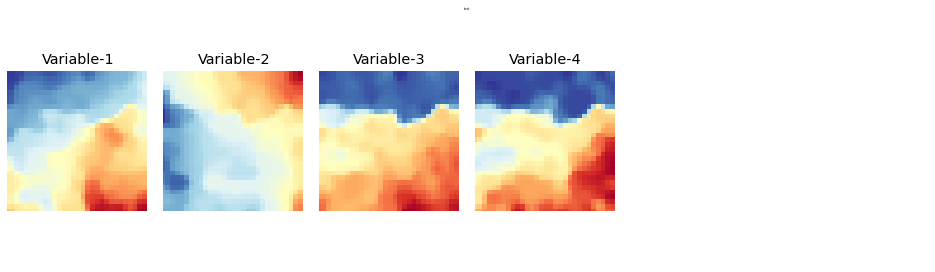

In [0]:
#@title Visualisation des variables
v = mapview.View2DPacked(50, 50, 'test', text_size=12)
v.show(sm)

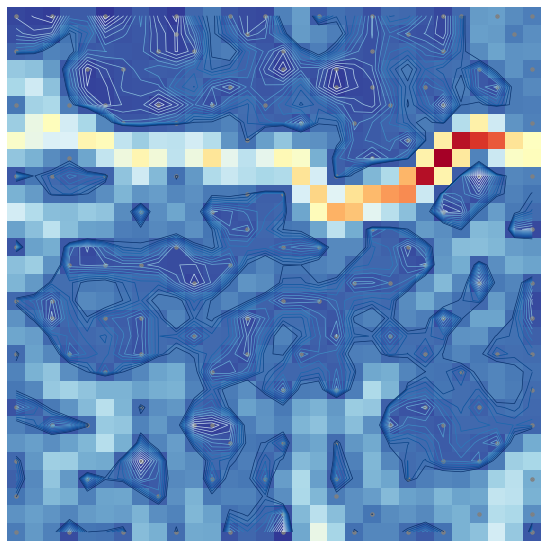

([], array([[0.06108298, 0.05433409, 0.04480956, 0.09266145, 0.09251997,
         0.03292103, 0.06160422, 0.09499569, 0.06064103, 0.0444847 ,
         0.11402165, 0.14603868, 0.08707243, 0.06986053, 0.06617664,
         0.1581545 , 0.20709212, 0.09511843, 0.12790576, 0.11604972,
         0.07699087, 0.12307904, 0.11911867, 0.08598288, 0.06258977,
         0.11754229, 0.20513269, 0.21086801, 0.17591063, 0.15146397],
        [0.07366543, 0.06457028, 0.07116503, 0.13722043, 0.11542784,
         0.07236782, 0.08347393, 0.090743  , 0.06836844, 0.05402405,
         0.08532477, 0.14249654, 0.10865079, 0.07002128, 0.0830557 ,
         0.12072631, 0.20251738, 0.17601715, 0.15442474, 0.10508708,
         0.07680897, 0.09895171, 0.08281189, 0.07699787, 0.06428125,
         0.11494971, 0.21334602, 0.205517  , 0.14945328, 0.17989741],
        [0.10631846, 0.11400811, 0.16254727, 0.15219173, 0.09015221,
         0.09242988, 0.09129543, 0.08756661, 0.0689058 , 0.05421437,
         0.06673774, 0.14015

In [0]:
#@title Umatrix
umatrix.UMatrixView(50, 50, 'test', text_size=12).show(sm)

/content/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


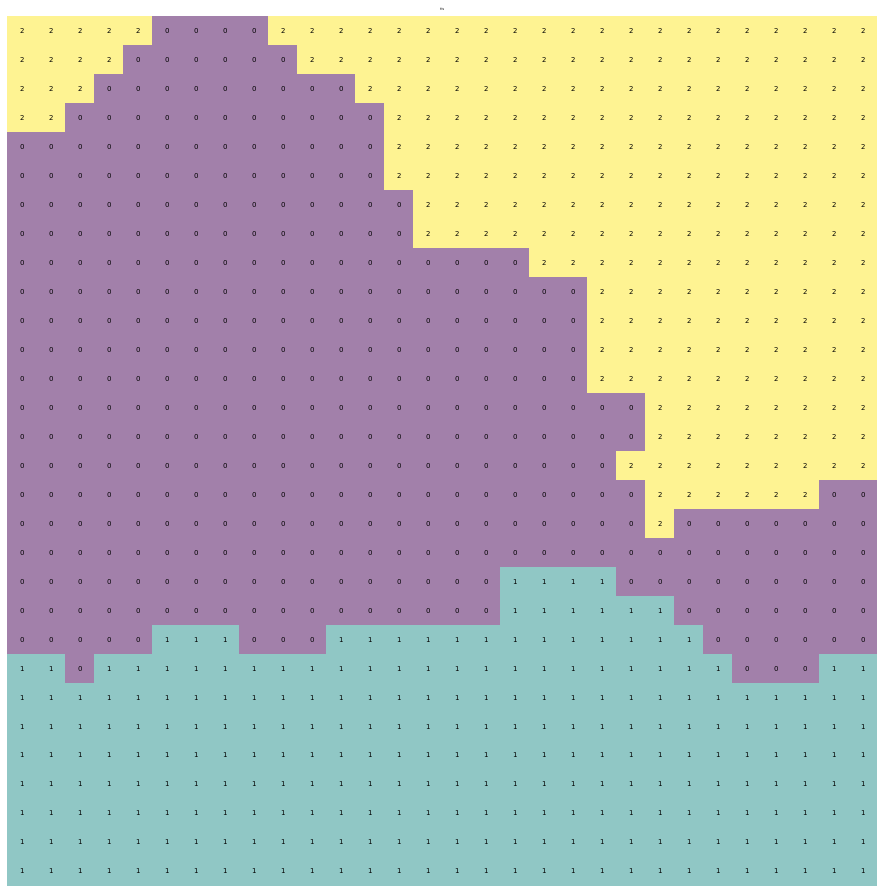

In [0]:
#@title Visualisation Hitmap
v = hitmap.HitMapView(50,50,'iris')
v.show(sm)

In [0]:
#@title Clustering Kmeans
c = sm.cluster(n_clusters=3)
print(c)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 